<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Processamento de Linguagem Natural
## Modelos de Classificação de Textos

**Women's E-Commerce Clothing Reviews**

Referência:
* https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import numpy as np
import pandas as pd
import math

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de manipulação de textos
import re
import string

# Pacotes de Modelagem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Funções adicionais
import preditiva

# Pacotes utilitários
import time

## Importação da base de dados

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', 
                 index_col=0)
df['avaliacao'] = np.where(df['Rating'] >= 4, 'positiva', 'negativa')
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,avaliacao
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,positiva
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,positiva
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,negativa
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,positiva
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,positiva
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,positiva
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,negativa
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,negativa
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,negativa


## Modelos de Classificação de Textos

### *Bag-of-Words*

In [3]:
# Importação das representações
start_time = time.time()
df_bow = pd.read_csv('df_women_bow.csv', index_col=0)
print("Tempo de carga da base de dados: %s segundos" % (time.time() - start_time))

Tempo de treinamento: 57.30533480644226 segundos


In [4]:
df_bow.head()

,00p,00p 0p,00p base,00p bit,00p difference,00p order,00p xxs,0p,0p 00p,0p fit,...,zipper run,zipper size,zipper sleeve,zipper step,zipper stick,zipper time,zipper ultimately,zoom,zoom detail,avaliacao
10534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negativa
22973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positiva
9030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negativa
21218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutro
10849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positiva


In [5]:
df_bow['avaliacao'] = np.where(df_bow['avaliacao']=='positiva', 1, 0)
df_bow

,00p,00p 0p,00p base,00p bit,00p difference,00p order,00p xxs,0p,0p 00p,0p fit,...,zipper run,zipper size,zipper sleeve,zipper step,zipper stick,zipper time,zipper ultimately,zoom,zoom detail,avaliacao
10534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


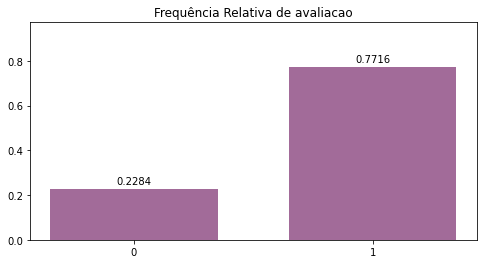

In [6]:
preditiva.cria_grafico_var_qualitativa(
    preditiva.tabela_bivariada(df_bow, 'avaliacao'))

#### Definição do *Target* e das *Features*

In [7]:
# Target (variável resposta)
y_bow = df_bow['avaliacao']

# Features (variáveis explicativas)
x_bow = df_bow.drop('avaliacao', axis=1).copy()

#### Divisão das bases em Treino e Teste

In [8]:
# Divisão em treino e teste
from sklearn.model_selection import train_test_split
x_train_bow, x_test_bow,\
    y_train_bow, y_test_bow = train_test_split(x_bow, y_bow, 
                                               stratify=y_bow,
                                               test_size=0.30,
                                               random_state=42)

#### Desenvolvimento do Classificador

In [9]:
# Treinamento de um modelo Gradient Boosting
start_time = time.time()
modelo_bow = GradientBoostingClassifier(n_estimators=100,
                                        subsample=0.5,
                                        random_state=42)
modelo_bow.fit(x_train_bow, y_train_bow)
print("Tempo de treinamento: %s segundos" % (time.time() - start_time))

Tempo de treinamento: 26.5150625705719 segundos


In [10]:
preditiva.calcula_desempenho(modelo_bow, 
                             x_train_bow, y_train_bow, 
                             x_test_bow, y_test_bow)

,Treino,Teste,Variação
Acurácia,0.883648,0.812317,-0.08
AUROC,0.969223,0.816144,-0.16
KS,0.838139,0.482037,-0.42
Precision,0.876445,0.830565,-0.05
Recall,0.988590,0.950570,-0.04
F1,0.929146,0.886525,-0.05


### TF-IDF

In [11]:
# Importação das representações
start_time = time.time()
df_tfidf = pd.read_csv('df_women_tfidf.csv', index_col=0)
print("Tempo de carregamento da base de dados: %s segundos" % (time.time() - start_time))

Tempo de treinamento: 84.17630362510681 segundos


In [12]:
df_tfidf.head()

,00p,00p 0p,00p base,00p bit,00p difference,00p order,00p xxs,0p,0p 00p,0p fit,...,zipper ribbon,zipper run,zipper size,zipper sleeve,zipper step,zipper stick,zipper time,zipper ultimately,zoom,zoom detail
10534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_tfidf = df_tfidf.join(df[['avaliacao']], how='left')
df_tfidf['avaliacao'] = np.where(df_tfidf['avaliacao']=='positiva', 1, 0)
df_tfidf

,00p,00p 0p,00p base,00p bit,00p difference,00p order,00p xxs,0p,0p 00p,0p fit,...,zipper run,zipper size,zipper sleeve,zipper step,zipper stick,zipper time,zipper ultimately,zoom,zoom detail,avaliacao
10534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
17060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


#### Definição do *Target* e das *Features*

In [14]:
# Target (variável resposta)
y_tfidf = df_tfidf['avaliacao']

# Features (variáveis explicativas)
x_tfidf = df_tfidf.drop('avaliacao', axis=1).copy()

#### Divisão das bases em Treino e Teste

In [15]:
# Divisão em treino e teste
from sklearn.model_selection import train_test_split
x_train_tfidf, x_test_tfidf,\
    y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y_tfidf, 
                                                   stratify=y_tfidf,
                                                   test_size=0.30,
                                                   random_state=42)

#### Desenvolvimento do Classificador

In [16]:
# Treinamento de um modelo Gradient Boosting
start_time = time.time()
modelo_tfidf = GradientBoostingClassifier(n_estimators=100,
                                          subsample=0.5,
                                          random_state=42)
modelo_tfidf.fit(x_train_tfidf, y_train_tfidf)
print("Tempo de treinamento: %s segundos" % (time.time() - start_time))

Tempo de treinamento: 26.857572078704834 segundos


In [17]:
preditiva.calcula_desempenho(modelo_tfidf, 
                             x_train_tfidf, y_train_tfidf, 
                             x_test_tfidf, y_test_tfidf)

,Treino,Teste,Variação
Acurácia,0.893082,0.822581,-0.08
AUROC,0.981668,0.817777,-0.17
KS,0.889827,0.453544,-0.49
Precision,0.885485,0.829268,-0.06
Recall,0.989405,0.969582,-0.02
F1,0.934565,0.893953,-0.04


In [10]:
preditiva.calcula_desempenho(modelo_bow, 
                             x_train_bow, y_train_bow, 
                             x_test_bow, y_test_bow)

,Treino,Teste,Variação
Acurácia,0.883648,0.812317,-0.08
AUROC,0.969223,0.816144,-0.16
KS,0.838139,0.482037,-0.42
Precision,0.876445,0.830565,-0.05
Recall,0.988590,0.950570,-0.04
F1,0.929146,0.886525,-0.05


### Word2Vec: Modelo já treinado Google

In [18]:
# Importação das representações
df_w2v_google = pd.read_csv('df_women_w2v_google.csv', index_col=0)
df_w2v_google.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
10534,0.043812,0.063727,-0.002272,0.106411,-0.030546,-0.050435,0.117193,-0.148031,0.120425,0.064082,...,-0.040444,0.108103,-0.085971,0.021502,0.036705,-0.053703,0.045374,-0.041807,-0.010364,0.008672
22973,0.040678,0.030279,-0.037781,0.125207,-0.017432,-0.049331,0.125215,-0.130177,-0.016977,0.095810,...,-0.092308,0.031427,-0.057408,-0.027900,0.027097,0.005415,0.082912,-0.057009,0.068681,-0.017483
9030,0.032794,0.120877,-0.030398,0.136218,-0.026514,-0.009312,0.099023,-0.044906,0.040895,0.075613,...,-0.102022,0.042480,-0.083354,-0.009023,-0.089001,-0.014423,0.061467,-0.004715,-0.001182,0.009338
21218,0.024464,0.059339,-0.031043,0.118214,0.018721,-0.084339,0.052358,-0.088030,0.031361,0.107144,...,-0.030796,0.066062,-0.058938,-0.016590,0.007625,-0.045883,0.006197,-0.041673,0.014467,-0.030833
10849,0.027258,0.053833,-0.058205,0.087278,-0.021917,-0.013682,0.076224,-0.098192,0.029991,0.136363,...,0.008973,0.025071,-0.100729,-0.002915,-0.003282,-0.041406,0.067447,-0.079895,0.015813,0.008160


In [19]:
df_w2v_google = df_w2v_google.join(df[['avaliacao']], how='left')
df_w2v_google['avaliacao'] = np.where(df_w2v_google['avaliacao']=='positiva', 1, 0)
df_w2v_google

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,avaliacao
10534,0.043812,0.063727,-0.002272,0.106411,-0.030546,-0.050435,0.117193,-0.148031,0.120425,0.064082,...,0.108103,-0.085971,0.021502,0.036705,-0.053703,0.045374,-0.041807,-0.010364,0.008672,0
22973,0.040678,0.030279,-0.037781,0.125207,-0.017432,-0.049331,0.125215,-0.130177,-0.016977,0.095810,...,0.031427,-0.057408,-0.027900,0.027097,0.005415,0.082912,-0.057009,0.068681,-0.017483,1
9030,0.032794,0.120877,-0.030398,0.136218,-0.026514,-0.009312,0.099023,-0.044906,0.040895,0.075613,...,0.042480,-0.083354,-0.009023,-0.089001,-0.014423,0.061467,-0.004715,-0.001182,0.009338,0
21218,0.024464,0.059339,-0.031043,0.118214,0.018721,-0.084339,0.052358,-0.088030,0.031361,0.107144,...,0.066062,-0.058938,-0.016590,0.007625,-0.045883,0.006197,-0.041673,0.014467,-0.030833,0
10849,0.027258,0.053833,-0.058205,0.087278,-0.021917,-0.013682,0.076224,-0.098192,0.029991,0.136363,...,0.025071,-0.100729,-0.002915,-0.003282,-0.041406,0.067447,-0.079895,0.015813,0.008160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19335,0.020852,0.084577,-0.106463,0.116028,-0.058284,-0.044961,0.152693,-0.141765,0.040222,0.097883,...,0.071498,-0.138759,-0.121914,0.036067,-0.056449,0.059256,-0.017984,-0.000607,0.008628,1
11995,0.013826,0.034770,-0.063559,0.083366,-0.058625,-0.021891,0.109486,-0.098833,0.040357,0.090778,...,0.025778,-0.093870,-0.016342,0.014032,-0.040300,0.085748,-0.078287,-0.045535,0.044526,1
2797,0.005929,0.019362,-0.058605,0.129843,-0.021963,-0.043733,0.083452,-0.152491,0.050750,0.072295,...,0.047055,-0.077176,0.040207,-0.020793,-0.049090,0.071145,-0.084732,0.039386,-0.047223,0
17060,-0.046265,0.101034,-0.032735,0.119288,0.081950,0.037994,0.112040,-0.079488,0.084025,0.000651,...,0.121989,-0.164040,0.038593,0.051066,0.034220,0.156148,0.000610,-0.012826,0.026367,1


#### Definição do *Target* e das *Features*

In [20]:
# Target (variável resposta)
y_w2v_google = df_w2v_google['avaliacao']

# Features (variáveis explicativas)
x_w2v_google = df_w2v_google.drop('avaliacao', axis=1).copy()

#### Divisão das bases em Treino e Teste

In [21]:
# Divisão em treino e teste
from sklearn.model_selection import train_test_split
x_train_w2v_google, x_test_w2v_google,\
    y_train_w2v_google, y_test_w2v_google = train_test_split(x_w2v_google, y_w2v_google, 
                                                             stratify=y_w2v_google,
                                                             test_size=0.30,
                                                             random_state=42)

#### Desenvolvimento do Classificador

In [22]:
# Treinamento de um modelo Gradient Boosting
start_time = time.time()
modelo_w2v_google = GradientBoostingClassifier(n_estimators=100,
                                               subsample=0.5,
                                               random_state=42)
modelo_w2v_google.fit(x_train_w2v_google, y_train_w2v_google)
print("Tempo de treinamento: %s segundos" % (time.time() - start_time))

Tempo de treinamento: 4.570998191833496 segundos


In [23]:
preditiva.calcula_desempenho(modelo_w2v_google, 
                             x_train_w2v_google, y_train_w2v_google, 
                             x_test_w2v_google, y_test_w2v_google)

,Treino,Teste,Variação
Acurácia,0.967925,0.822581,-0.15
AUROC,0.998547,0.828641,-0.17
KS,0.972176,0.541752,-0.44
Precision,0.962264,0.838063,-0.13
Recall,0.997555,0.954373,-0.04
F1,0.979592,0.892444,-0.09


In [17]:
preditiva.calcula_desempenho(modelo_tfidf, 
                             x_train_tfidf, y_train_tfidf, 
                             x_test_tfidf, y_test_tfidf)

,Treino,Teste,Variação
Acurácia,0.893082,0.822581,-0.08
AUROC,0.981668,0.817777,-0.17
KS,0.889827,0.453544,-0.49
Precision,0.885485,0.829268,-0.06
Recall,0.989405,0.969582,-0.02
F1,0.934565,0.893953,-0.04


### Word2Vec: Modelo Próprio - Customizado

In [24]:
# Importação das representações
df_w2v_custom = pd.read_csv('df_women_w2v_custom.csv', index_col=0)
df_w2v_custom.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
10534,-0.276926,0.004853,0.236366,-0.503003,0.323874,0.283355,-0.111078,0.301404,0.104241,-0.011498,...,0.061257,0.349526,-0.039134,-0.018739,-0.423837,-0.273590,0.105775,-0.038622,-0.202878,-0.027837
22973,-0.130511,0.053488,0.181874,-0.264410,0.175381,0.367443,0.031796,0.434522,0.069983,0.331401,...,0.058410,0.305018,-0.279663,0.011621,-0.308280,-0.123705,-0.153002,0.152523,-0.089863,0.209689
9030,-0.074993,-0.006530,0.156359,-0.085853,0.168715,0.438929,-0.071933,0.290939,-0.013596,0.426117,...,0.276369,0.171014,-0.139773,0.115294,-0.195972,-0.344380,-0.030118,0.053313,-0.066554,0.093693
21218,-0.244007,0.121926,0.125164,-0.330205,0.115848,0.268198,-0.039565,0.510206,0.060452,0.340989,...,0.116325,0.393477,-0.163645,0.061289,-0.409972,-0.178181,-0.168145,0.072967,-0.082673,0.022157
10849,-0.176660,0.065127,0.118090,-0.343145,0.066700,0.478227,-0.324060,0.339905,0.001272,0.110146,...,-0.043228,0.267416,0.026905,-0.113373,-0.257314,-0.150606,-0.403663,0.002573,-0.167198,0.049266


In [25]:
df_w2v_custom = df_w2v_custom.join(df[['avaliacao']], how='left')
df_w2v_custom['avaliacao'] = np.where(df_w2v_custom['avaliacao']=='positiva', 1, 0)
df_w2v_custom

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,avaliacao
10534,-0.276926,0.004853,0.236366,-0.503003,0.323874,0.283355,-0.111078,0.301404,0.104241,-0.011498,...,0.349526,-0.039134,-0.018739,-0.423837,-0.273590,0.105775,-0.038622,-0.202878,-0.027837,0
22973,-0.130511,0.053488,0.181874,-0.264410,0.175381,0.367443,0.031796,0.434522,0.069983,0.331401,...,0.305018,-0.279663,0.011621,-0.308280,-0.123705,-0.153002,0.152523,-0.089863,0.209689,1
9030,-0.074993,-0.006530,0.156359,-0.085853,0.168715,0.438929,-0.071933,0.290939,-0.013596,0.426117,...,0.171014,-0.139773,0.115294,-0.195972,-0.344380,-0.030118,0.053313,-0.066554,0.093693,0
21218,-0.244007,0.121926,0.125164,-0.330205,0.115848,0.268198,-0.039565,0.510206,0.060452,0.340989,...,0.393477,-0.163645,0.061289,-0.409972,-0.178181,-0.168145,0.072967,-0.082673,0.022157,0
10849,-0.176660,0.065127,0.118090,-0.343145,0.066700,0.478227,-0.324060,0.339905,0.001272,0.110146,...,0.267416,0.026905,-0.113373,-0.257314,-0.150606,-0.403663,0.002573,-0.167198,0.049266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19335,0.017997,-0.051379,0.027889,-0.084844,0.085829,0.457506,-0.095692,0.229995,-0.145155,0.211764,...,0.189046,0.003922,-0.057879,-0.228406,-0.172309,-0.076947,0.140106,-0.307111,0.074638,1
11995,-0.095473,0.040303,0.233083,-0.227259,0.191389,0.395750,-0.085874,0.226371,-0.007217,0.131752,...,0.225510,-0.246224,-0.188839,-0.411831,-0.302604,-0.267459,0.034479,-0.227573,0.097752,1
2797,-0.032272,-0.029496,0.214733,-0.345125,0.280087,0.357449,-0.185807,0.528679,0.033748,0.278137,...,0.189626,-0.248173,-0.109578,-0.500273,-0.237783,-0.082131,-0.146323,0.000093,0.182490,0
17060,0.254912,-0.006299,0.199988,-0.301171,0.123774,0.327542,-0.296908,0.329218,-0.213395,-0.026235,...,0.108952,-0.172600,-0.049387,-0.182618,-0.291132,-0.430419,0.232488,-0.093170,0.099025,1


#### Definição do *Target* e das *Features*

In [26]:
# Target (variável resposta)
y_w2v_custom = df_w2v_custom['avaliacao']

# Features (variáveis explicativas)
x_w2v_custom = df_w2v_custom.drop('avaliacao', axis=1).copy()

#### Divisão das bases em Treino e Teste

In [27]:
# Divisão em treino e teste
from sklearn.model_selection import train_test_split
x_train_w2v_custom, x_test_w2v_custom,\
    y_train_w2v_custom, y_test_w2v_custom = train_test_split(x_w2v_custom, y_w2v_custom, 
                                                             stratify=y_w2v_custom,
                                                             test_size=0.30,
                                                             random_state=42)

#### Desenvolvimento do Classificador

In [28]:
# Treinamento de um modelo Gradient Boosting
start_time = time.time()
modelo_w2v_custom = GradientBoostingClassifier(n_estimators=100,
                                               subsample=0.5,
                                               random_state=42)
modelo_w2v_custom.fit(x_train_w2v_custom, y_train_w2v_custom)
print("Tempo de treinamento: %s segundos" % (time.time() - start_time))

Tempo de treinamento: 1.572023630142212 segundos


In [29]:
preditiva.calcula_desempenho(modelo_w2v_custom, 
                             x_train_w2v_custom, y_train_w2v_custom, 
                             x_test_w2v_custom, y_test_w2v_custom)

,Treino,Teste,Variação
Acurácia,0.947799,0.813783,-0.14
AUROC,0.989854,0.853746,-0.14
KS,0.908848,0.591986,-0.35
Precision,0.943411,0.837563,-0.11
Recall,0.991850,0.941065,-0.05
F1,0.967024,0.886303,-0.08


In [23]:
preditiva.calcula_desempenho(modelo_w2v_google, 
                             x_train_w2v_google, y_train_w2v_google, 
                             x_test_w2v_google, y_test_w2v_google)

,Treino,Teste,Variação
Acurácia,0.967925,0.822581,-0.15
AUROC,0.998547,0.828641,-0.17
KS,0.972176,0.541752,-0.44
Precision,0.962264,0.838063,-0.13
Recall,0.997555,0.954373,-0.04
F1,0.979592,0.892444,-0.09
